In [1]:
!pip install torch
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install sklearn
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from torch.utils.data import TensorDataset, DataLoader 

import matplotlib.pyplot as plt
import time, copy

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the XOR neural network class
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        return self.layers(x)

# Create an instance of the XOR network
net = XORNet()

# Define the input and target data
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0002)

# Train the network
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    outputs = net(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch+1) % 5000 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Test the network

test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_outputs = net(test_inputs).round()
print("Predictions:")
for i in range(test_inputs.shape[0]):
    print(f"Input: {test_inputs[i].tolist()}, Output: {test_outputs[i].tolist()}")

Epoch 5000/100000, Loss: 0.2504
Epoch 10000/100000, Loss: 0.2502
Epoch 15000/100000, Loss: 0.2502
Epoch 20000/100000, Loss: 0.2502
Epoch 25000/100000, Loss: 0.2502
Epoch 30000/100000, Loss: 0.2502
Epoch 35000/100000, Loss: 0.2502
Epoch 40000/100000, Loss: 0.2502
Epoch 45000/100000, Loss: 0.2501
Epoch 50000/100000, Loss: 0.2501
Epoch 55000/100000, Loss: 0.2501
Epoch 60000/100000, Loss: 0.2501
Epoch 65000/100000, Loss: 0.2501
Epoch 70000/100000, Loss: 0.2501
Epoch 75000/100000, Loss: 0.2501
Epoch 80000/100000, Loss: 0.2501
Epoch 85000/100000, Loss: 0.2501
Epoch 90000/100000, Loss: 0.2501
Epoch 95000/100000, Loss: 0.2501
Epoch 100000/100000, Loss: 0.2500
Predictions:
Input: [0.0, 0.0], Output: [0.0]
Input: [0.0, 1.0], Output: [1.0]
Input: [1.0, 0.0], Output: [0.0]
Input: [1.0, 1.0], Output: [1.0]


In [4]:
!rm abalone.data abalone.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

--2023-06-15 18:19:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.data’

abalone.data            [ <=>                ] 187.38K  1.02MB/s    in 0.2s    

2023-06-15 18:19:47 (1.02 MB/s) - ‘abalone.data’ saved [191873]

--2023-06-15 18:19:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.names’

abalone.names           [ <=>                ]   4.22K  --.-KB/s    in 0s      

2023-06-15 18:19:49 (52.2 MB/s) - ‘abalone.names’ saved

In [5]:
# As you can see we now require a lot of different modules
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from torch.utils.data import TensorDataset, DataLoader 

import matplotlib.pyplot as plt
import time, copy

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [6]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", 
                "Shucked weight", "Viscera weight", "Shell weights", "Rings"]
df = pd.read_csv('abalone.data', header=None, names=column_names)
df['Old'] = 0  # By default, abalone is Young
df.loc[(df['Rings'] >= 10), 'Old'] = 1 # 10 rings or more means an Abalone is old
class_labels = ['Young', 'Old']   # [0, 1], [N, P]
numerical_feature_columns = column_names[1:5] # We first only want to classify with numerical features excluding sex and only the whole weight
print(numerical_feature_columns)
label_column = 'Old'


df.head() # Visualize a subset of the dataset

['Length', 'Diameter', 'Height', 'Whole weight']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weights,Rings,Old
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [7]:


def train_test_val_split(df, feature_columns, label_column, ct):
  # First perform an 80/20 train/test split
  initial_train_split = df.sample(frac=.8,random_state=42)
  test = df.drop(initial_train_split.index)
  
  # Next perform a 75/25 train/val split
  train = initial_train_split.sample(frac=.75, random_state=42)
  val = initial_train_split.drop(train.index)
  
  # Split all of the datasets into features and labels (x and y)
  train_x = train[feature_columns]
  # We won't be transforming the labels so they can go straight to torch tensors
  train_y = torch.from_numpy(train[label_column].values)

  val_x = val[feature_columns]
  val_y = torch.from_numpy(val[label_column].values)

  test_x = test[feature_columns]
  test_y = torch.from_numpy(test[label_column].values)

  # Fit our ColumnTransformer to the train dataset
  ct.fit(train_x)

  # Perform the standardization on each of the x datasets
  train_x = ct.transform(train_x)
  val_x = ct.transform(val_x)
  test_x = ct.transform(test_x)

  # Transform our datasets into Torch Tensors
  train_x = torch.from_numpy(train_x).float()
  val_x = torch.from_numpy(val_x).float()
  test_x = torch.from_numpy(test_x).float()

  # Create the input-label pair datasets to be consumed by PyTorch
  train_dataset = TensorDataset(train_x, train_y)
  test_dataset = TensorDataset(test_x, test_y)
  val_dataset = TensorDataset(val_x, val_y)
  return train_dataset, test_dataset, val_dataset
ct = ColumnTransformer([('numerical_features', StandardScaler(), numerical_feature_columns)], remainder='passthrough')

train_dataset, test_dataset, val_dataset = train_test_val_split(df, numerical_feature_columns, label_column, ct)

In [8]:
# device config (train our model on GPU if it is available which is much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters

# model architecture
input_size = len(numerical_feature_columns) # Make sure to remove the index column
hidden_size1 = 64
hidden_size2 = 64
hidden_size3 = 64
num_classes = 2

In [9]:
batch_size = 10
dataloaders = {'train': DataLoader(train_dataset, batch_size=batch_size),
               'val': DataLoader(val_dataset, batch_size=batch_size),
               'test': DataLoader(test_dataset, batch_size=batch_size)}

dataset_sizes = {'train': len(train_dataset),
                 'val': len(val_dataset),
                 'test': len(test_dataset)}
print(f'dataset_sizes = {dataset_sizes}')

dataset_sizes = {'train': 2506, 'val': 836, 'test': 835}


In [10]:
# external training parameters

learning_rate = 0.001
num_epochs = 50

In [11]:
class SimpleClassifier2Layer(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(SimpleClassifier2Layer, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, num_classes),
        )

    def forward(self, x):
        return self.layers(x)

# Simple three-hidden-layer classification model
class SimpleClassifier3Layer(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(SimpleClassifier3Layer, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, num_classes),
        )

    def forward(self, x):
        return self.layers(x)

In [12]:
two_layer_model = SimpleClassifier2Layer(input_size, hidden_size1, hidden_size2, num_classes).to(device)
print(two_layer_model)

three_layer_model = SimpleClassifier3Layer(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)
print(three_layer_model)

SimpleClassifier2Layer(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
  )
)
SimpleClassifier3Layer(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [13]:
def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) # keep the best weights stored separately
    best_acc = 0.0
    best_epoch = 0

    # Each epoch has a training, validation, and test phase
    phases = ['train', 'val', 'test']
    
    # Keep track of how loss and accuracy evolves during training
    training_curves = {}
    for phase in phases:
        training_curves[phase+'_loss'] = []
        training_curves[phase+'_acc'] = []
    
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in phases:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                # This ensures all of our datapoints are flattened
                # before feeding them to our model
                inputs = inputs.view(inputs.shape[0],-1)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, predictions = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + update weights only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(predictions == labels.data)
 
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            training_curves[phase+'_loss'].append(epoch_loss)
            training_curves[phase+'_acc'].append(epoch_acc)

            print(f'{phase:5} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model if it's the best accuracy (based on validation)
            if phase == 'val' and epoch_acc > best_acc:
                best_epoch = epoch
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f} at epoch {best_epoch}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, training_curves

# Two-hidden-Layer Training
# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(two_layer_model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
two_layer_model, training_curves_two_layer = train_model(two_layer_model, dataloaders, dataset_sizes, 
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/50
----------
train Loss: 0.5373 Acc: 0.7354
val   Loss: 0.4640 Acc: 0.7703
test  Loss: 0.5245 Acc: 0.7234

Epoch 2/50
----------
train Loss: 0.5204 Acc: 0.7374
val   Loss: 0.4601 Acc: 0.7727
test  Loss: 0.5225 Acc: 0.7257

Epoch 3/50
----------
train Loss: 0.5161 Acc: 0.7402
val   Loss: 0.4585 Acc: 0.7787
test  Loss: 0.5220 Acc: 0.7222

Epoch 4/50
----------
train Loss: 0.5122 Acc: 0.7438
val   Loss: 0.4574 Acc: 0.7775
test  Loss: 0.5218 Acc: 0.7222

Epoch 5/50
----------
train Loss: 0.5080 Acc: 0.7438
val   Loss: 0.4550 Acc: 0.7787
test  Loss: 0.5213 Acc: 0.7198

Epoch 6/50
----------
train Loss: 0.5051 Acc: 0.7470
val   Loss: 0.4541 Acc: 0.7835
test  Loss: 0.5210 Acc: 0.7174

Epoch 7/50
----------
train Loss: 0.5036 Acc: 0.7510
val   Loss: 0.4535 Acc: 0.7847
test  Loss: 0.5209 Acc: 0.7174

Epoch 8/50
----------
train Loss: 0.5024 Acc: 0.7518
val   Loss: 0.4527 Acc: 0.7859
test  Loss: 0.5208 Acc: 0.7198

Epoch 9/50
----------
train Loss: 0.5013 Acc: 0.7510
val   Loss: 0.4524

In [14]:
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(three_layer_model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
three_layer_model, training_curves_three_layer = train_model(three_layer_model, dataloaders, dataset_sizes, 
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/50
----------
train Loss: 0.5431 Acc: 0.7314
val   Loss: 0.4644 Acc: 0.7667
test  Loss: 0.5317 Acc: 0.7174

Epoch 2/50
----------
train Loss: 0.5242 Acc: 0.7426
val   Loss: 0.4542 Acc: 0.7775
test  Loss: 0.5292 Acc: 0.7174

Epoch 3/50
----------
train Loss: 0.5177 Acc: 0.7410
val   Loss: 0.4517 Acc: 0.7835
test  Loss: 0.5266 Acc: 0.7150

Epoch 4/50
----------
train Loss: 0.5121 Acc: 0.7438
val   Loss: 0.4506 Acc: 0.7883
test  Loss: 0.5263 Acc: 0.7234

Epoch 5/50
----------
train Loss: 0.5079 Acc: 0.7458
val   Loss: 0.4499 Acc: 0.7835
test  Loss: 0.5257 Acc: 0.7174

Epoch 6/50
----------
train Loss: 0.5063 Acc: 0.7466
val   Loss: 0.4498 Acc: 0.7847
test  Loss: 0.5256 Acc: 0.7162

Epoch 7/50
----------
train Loss: 0.5053 Acc: 0.7494
val   Loss: 0.4498 Acc: 0.7847
test  Loss: 0.5253 Acc: 0.7174

Epoch 8/50
----------
train Loss: 0.5041 Acc: 0.7526
val   Loss: 0.4500 Acc: 0.7823
test  Loss: 0.5251 Acc: 0.7186

Epoch 9/50
----------
train Loss: 0.5033 Acc: 0.7522
val   Loss: 0.4506

In [15]:
def plot_training_curves(training_curves, 
                         phases=['train', 'val', 'test'],
                         metrics=['loss','acc']):
    epochs = list(range(len(training_curves['train_loss'])))
    for metric in metrics:
        plt.figure()
        plt.title(f'Training curves - {metric}')
        for phase in phases:
            key = phase+'_'+metric
            if key in training_curves:
                plt.plot(epochs, training_curves[phase+'_'+metric])
        plt.xlabel('epoch')
        plt.legend(labels=phases)

def classify_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_labels = torch.tensor([]).to(device)
    all_scores = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = torch.softmax(model(inputs),dim=1)
        _, preds = torch.max(outputs, 1)
        scores = outputs[:,1]
        all_labels = torch.cat((all_labels, labels), 0)
        all_scores = torch.cat((all_scores, scores), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_labels.detach().cpu(), all_scores.detach().cpu()

def plot_regression(model, device, dataloader):
    preds, targets = regress_predictions(model, device, dataloader)
    plt.figure()
    plt.title(f'Regression results')
    plt.scatter(targets, preds)
    xmin = min(min(targets), min(preds))
    xmax = max(max(targets), max(targets))
    plt.plot([xmin, xmax], [xmin, xmax], 'black', linestyle='--', marker='')
    plt.xlabel('target value')
    plt.ylabel('prediced value')

def regress_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_targets = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        preds = model(inputs)
        all_targets = torch.cat((all_targets, targets), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_targets.detach().cpu()

def plot_metrics(model, device, dataloaders, phase='test'):
    preds, labels, scores = classify_predictions(model, device, dataloaders[phase])

    fpr, tpr, thresholds = metrics.roc_curve(labels, scores)
    auc = metrics.roc_auc_score(labels, preds)
    
    disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    ind = np.argmin(np.abs(thresholds - 0.5))
    ax = disp.plot().ax_
    ax.scatter(fpr[ind], tpr[ind], color = 'red')
    ax.set_title('ROC Curve (red dot at threshold = 0.5)')
    
    cm = metrics.confusion_matrix(labels, preds)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    #disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- counts')

    ncm = metrics.confusion_matrix(labels, preds, normalize='true')
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=ncm)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- rates')

    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1] 
    N, P = TN + FP, TP + FN 
    ACC = (TP + TN)/(P+N)
    TPR, FPR, FNR, TNR = TP/P, FP/N, FN/P, TN/N
    print(f'\nAt default threshold:')
    print(f' TN = {TN:5},  FP = {FP:5} -> N = {N:5}')
    print(f' FN = {FN:5},  TP = {TP:5} -> P = {P:5}')
    print(f'TNR = {TNR:5.3f}, FPR = {FPR:5.3f}')
    print(f'FNR = {FNR:5.3f}, TPR = {TPR:5.3f}')
    print(f'ACC = {ACC:6.3f}')

    return cm, fpr, tpr, thresholds, auc


At default threshold:
 TN =   244,  FP =   157 -> N =   401
 FN =    86,  TP =   348 -> P =   434
TNR = 0.608, FPR = 0.392
FNR = 0.198, TPR = 0.802
ACC =  0.709


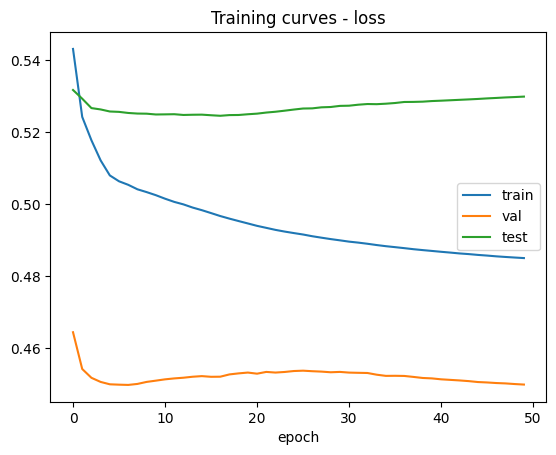

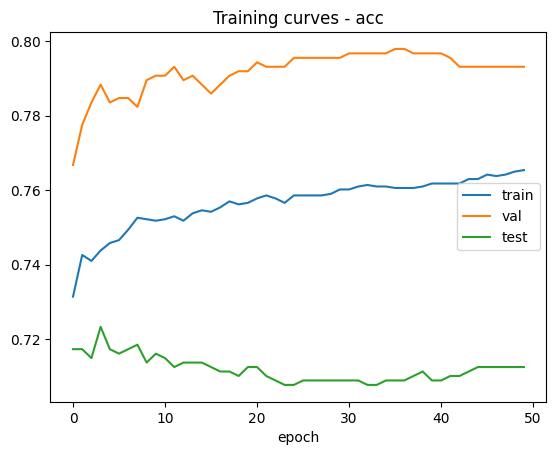

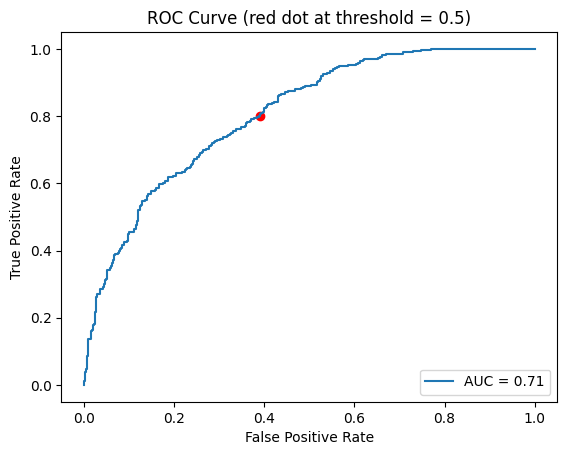

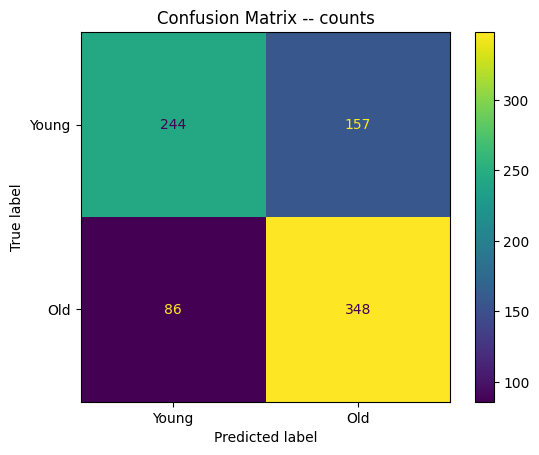

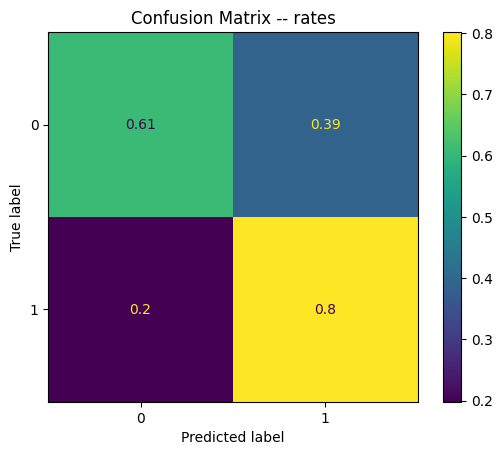

In [16]:
plot_training_curves(training_curves_three_layer, phases=['train', 'val', 'test'])
res = plot_metrics(three_layer_model, device, dataloaders, phase='test')